# MBHL Computational Lithography Demo

This is a simple demonstration for computational lithography simulation used for MBHL process. 

The simulation codes are in package `mbhl` within this repository. Please take a look at [`mbhl/simulation.py`](mbhl/simulation.py).

An MBHL simulation consists of these classes
- `Mask`: the geometric representation of the stencil
- `Physics`: definition of the deposition process, including the trajectory of incidence, stencil-substrate spacing etc.
- `System`: combination of `Mask` and `Physics`

Let's start the simulation with some default settings:
- stencil-substrate spacing: 2.5 μm
- non-directional diffusion: 15 nm
- tilting angle: 5°

In [18]:
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
from mbhl.simulation import Mask, Physics, System, Circle, Rectangle, Square
from mbhl.simulation import nm, um

default_diffusion = 15 * nm
default_spacing = 2.5 * um
default_phi = np.deg2rad(5.0)

Let's first create a stencil (mask) with square lattice holes, you can create it using the unit cell representation.
A square lattice is constructed by repeating unit cell with dimension `(W, W)`, and a hole at `(0, 0)`. Let's visualize a square mask with hole radius of 50 nm and center-to-center spacing of 300 nm.

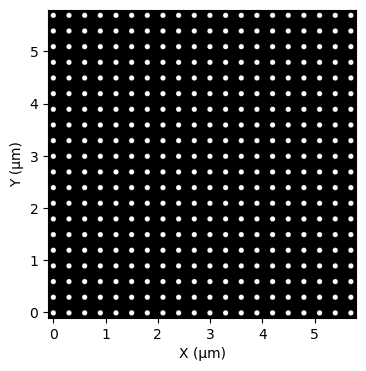

In [19]:
W = 300 * nm
radius = 50 * nm
positions = [Circle(0, 0, radius), ]
cell = (W, W)
mask = Mask(
        positions,
        unit_cell=cell,
        repeat=(20, 20),
        pad=50 * nm,
        thickness=100 * nm,   # thickness of the stencil
        spacing=default_spacing,
    )
fig, ax = plt.subplots(figsize=(6, 4))
mask.draw(ax, h=5 * nm)

Now let's define a trajectory. For the simpliest case let's just create a circular trajectory with `φ` at constant 5°.
The `Physics` class defines the instrument part of the MBHL process. For now let's consider no directional drift (`$R_s=0$`)

In [20]:
trajectory = np.array(
    [(default_phi, theta) for theta in np.deg2rad(np.linspace(0, 360))]
)
phys = Physics(trajectory, diffusion=default_diffusion, drift=0 * nm)

Finally, let's create the `System` class for simulation and visualize the deposition pattern under these conditions.

(1180, 1180)


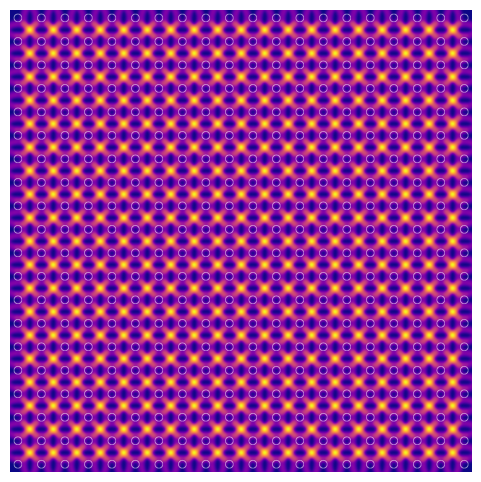

In [21]:
system = System(mask=mask, physics=phys)
# h is the grid spacing used to discretize the mesh
# decrease h if you want more refined grids but takes more time
conv = system.simulate(h=5 * nm)
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_axis_off()
system.draw(
    ax,
    mask_alpha=1.0,
    show_mask=True,   # If True, draw the position of holes in white circles
    cmap="plasma",
    mask_lw=1,   # line width of the mask patterns
)

Well done! If you want to explore more opportunities in MBHL, remeber to tune
1. The stencil design (*How to create a hexagonal stencil?*)
2. The trajectory (*What about multi-beam deposition?*)
3. Even weighted deposition (*add more weights to trajectory, WIP*)

For questions and collaborations, contact tian.tian@ualberta.ca